# Lab 3: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [2]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [3]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873202
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.10369354831097967
MSE is: 0.020220019584503236
RMSE is: 0.14219711524677017


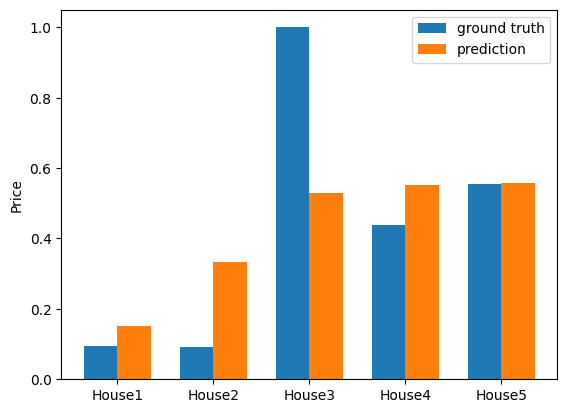

In [4]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [5]:
insurance_df = pd.read_csv('insurance.csv')

Check for missing values:

In [6]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values, so there is no need to deal with them (e.g. remove features with missing values or fill in missing values with mean or median).

Check which features are categorical:

In [7]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are three categorical features:

- sex
- smoker
- region

Here, I apply one-hot encoding to the categorical features:

In [8]:
from sklearn.preprocessing import OneHotEncoder

insurance_df_categorical = insurance_df.select_dtypes(exclude='number')
insurance_df_encoded = insurance_df.copy()

encoder = OneHotEncoder(sparse_output=False)
encoder_transform = encoder.fit_transform(insurance_df_encoded[insurance_df_categorical.columns])
encoder_transform_df = pd.DataFrame(encoder_transform, columns=encoder.get_feature_names_out())

insurance_df_encoded = pd.concat([insurance_df_encoded, encoder_transform_df], axis=1)
insurance_df_encoded = insurance_df_encoded.drop(insurance_df_categorical.columns, axis=1)
insurance_df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### 1.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [9]:
insurance_features_encoded = insurance_df_encoded.drop('charges', axis=1).values
insurance_charges = insurance_df_encoded['charges'].values
insurance_charges = insurance_charges / np.max(insurance_charges)

X_train, X_test, y_train, y_test = train_test_split(insurance_features_encoded,
                                                    insurance_charges,
                                                    test_size=0.2,
                                                    random_state=42)

standardizer = StandardScaler().fit(X_train)

X_train = standardizer.transform(X_train)
X_test = standardizer.transform(X_test)

X_train.shape, X_test.shape

((1070, 11), (268, 11))

### 1.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [10]:
linear_regression_model = LinearRegression().fit(X_train, y_train)

lr_y_train_pred = linear_regression_model.predict(X_train)

lr_train_mae = mean_absolute_error(lr_y_train_pred, y_train)
lr_train_mse = mean_squared_error(lr_y_train_pred, y_train)
lr_train_rmse = np.sqrt(lr_train_mse)

print(f'''
bias is {lr.intercept_}
coefficients are {lr.coef_}
prediction for training set:
MAE is {lr_train_mae}
MSE is {lr_train_mse}
RMSE is {lr_train_rmse}
''')


bias is 0.41438855869860675
coefficients are [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is 0.06649955016244494
MSE is 0.00919806357038848
RMSE is 0.0959065355978855



### 1.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.065750380258244
MSE is: 0.008256422466614566
RMSE is: 0.09086485826002573


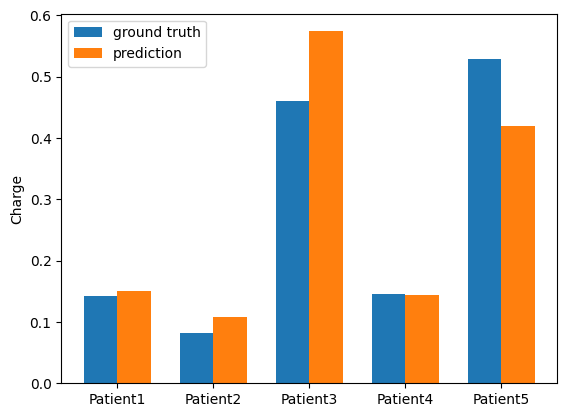

In [11]:
lr_y_test_pred = linear_regression_model.predict(X_test)

lr_test_mae = mean_absolute_error(lr_y_test_pred, y_test)
lr_test_mse = mean_squared_error(lr_y_test_pred, y_test)
lr_test_rmse = np.sqrt(lr_test_mse)

print('prediction for testing set:')
print(f'MAE is: {lr_test_mae}')
print(f'MSE is: {lr_test_mse}')
print(f'RMSE is: {lr_test_rmse}')

linear_regression_labels = [f'Patient{i}' for i in range(1,6)]
xs = np.arange(len(linear_regression_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(xs - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(xs + width/2, lr_y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Charge')
ax.set_xticks(xs)
ax.set_xticklabels(linear_regression_labels)
ax.legend()

plt.show()

### 1.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [12]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

ridge_y_test_pred = ridge_model.predict(X_test)
ridge_test_mae = mean_absolute_error(ridge_y_test_pred, y_test)
ridge_test_mse = mean_squared_error(ridge_y_test_pred, y_test)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print(f'''
ridge prediction for testing set:
Ridge test MAE is: {ridge_test_mae}
Ridge test MSE is: {ridge_test_mse}
Ridge test RMSE is: {ridge_test_rmse}
''')


ridge prediction for testing set:
Ridge test MAE is: 0.06556726079395205
Ridge test MSE is: 0.008261636502958193
Ridge test RMSE is: 0.09089354489158288



In [13]:
print(f'''
Ridge MAE < LR MAE: {ridge_test_mae < lr_test_mae} (Diff: {ridge_test_mae - lr_test_mae})
Ridge MSE < LR MSE: {ridge_test_mse < lr_test_mse} (Diff: {ridge_test_mse - lr_test_mse})
Ridge RMSE < LR RMSE: {ridge_test_rmse < lr_test_rmse} (Diff: {ridge_test_rmse - lr_test_rmse})
''')


Ridge MAE < LR MAE: True (Diff: -0.00018311946429196146)
Ridge MSE < LR MSE: False (Diff: 5.214036343627673e-06)
Ridge RMSE < LR RMSE: False (Diff: 2.8686631557153786e-05)



The ridge model has a lower MAE than the linear regression model however has a marginally larger MSE and RMSE than the linear regression model.
Overall, the ridge model and linear model perform similarly.

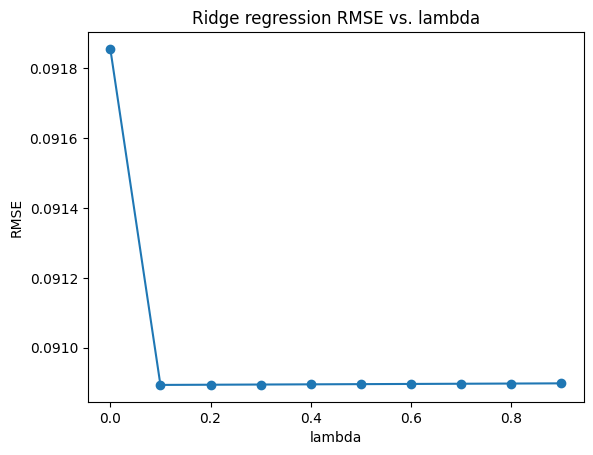

,lambda,rmse
0,0.0,0.091855
1,0.1,0.090894
2,0.2,0.090894
3,0.3,0.090895
4,0.4,0.090895
5,0.5,0.090896
6,0.6,0.090896
7,0.7,0.090897
8,0.8,0.090897
9,0.9,0.090898


In [14]:
fig, ax = plt.subplots()
xs = [x / 10 for x in range(0, 10)]
ys = []
for k in xs:
    k_ridge_model = Ridge(alpha=k).fit(X_train, y_train)

    k_ridge_y_test_pred = k_ridge_model.predict(X_test)
    k_ridge_test_mse = mean_squared_error(k_ridge_y_test_pred, y_test)
    k_ridge_test_rmse = np.sqrt(k_ridge_test_mse)
    ys.append(k_ridge_test_rmse)

ax.set_xlabel('lambda')
ax.set_ylabel('RMSE')
ax.set_title('Ridge regression RMSE vs. lambda')
ax.scatter(xs, ys)
ax.plot(xs, ys)

plt.show()
pd.DataFrame({'lambda':xs, 'rmse':ys})

From this graph, it appears that lambda=0.1 gives the best performance for the ridge regression model with respect to RMSE in this case.